## Feature Extraction

This notebook contains the code to extract experiment files, creates windows, extract features and saves them.

In [13]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
def list_folders_in_directory(directory: str) -> list:
    """
    This function reads all the User<ID> directories within specified folder and returns a list.
    
    For Example:
        list_folders_in_directory("datasets") returns ["User13", "User14",..., "User27"]
    """

    # Get a list of all items in the directory
    all_items = os.listdir(directory)

    # Filter out only directories with User in the name
    # Since our dataset contains sensor data in the format User<id>
    # We need to filter out the directories that do not contain User
    folders = [item for item in all_items if os.path.isdir(os.path.join(directory, item)) and "User" in item]

    return folders

In [15]:
def extract_experiment_id(filename):
    """
    It takes in a string like 123Datafile_Gyroscope and returns the experiment id "123"

    Sensor data might not always have name like 123_Gyroscope
    Sometimes it might be 123Datafile_Gyroscope
    Therefore, the function uses regex to extract the experiment id
    """
    match = re.match(r'(\d+)', filename)
    if match:
        return match.group(1)
    return None

In [16]:
import json

def get_activity_id_from_experiment_id(experiment_id: str) -> int:
    """
    The function takes in a string (experiment_id),
    and returns activity ID

    It reads a json file called data.json on dataset directory and extracts activity_no for a given experiment_id

    The JSON has the following format:
        {
            "133": 1,
            "134: 2
        }
    """

    with open('dataset/data.json', 'r') as file:
        experiment_to_activity_json = json.load(file) 

    return experiment_to_activity_json[experiment_id]

def get_activity_details_from_activity_id(activity_id: str):
    """
    The function takes in activity_id and returns a dictionary containing activity and details

    Example:
    get_activity_details_from_activity_id('1') -> {'activity': 'Sitting', 'details': 'Reading a book'}
    """
    with open('dataset/activity_details.json', 'r') as file:
        activity_details = json.load(file)

    return activity_details[activity_id]

In [17]:
def get_files_grouped_by_experiment(userId: str):
    """
    The function takes in a string userId and returns a dictionary of dictionary.

    The output is in the following structure
    {
        "133": {
            "accelerometer": "filename.csv",
            "gyroscope": "filename.csv"
        }
    }
    """
    all_files = os.listdir(f"dataset/{userId}")

    experiment_files = {}

    for file in all_files:
        sensor_type = ""
        if 'Accelerometer' in file:
            sensor_type = 'accelerometer'
        elif 'Gyroscope' in file:
            sensor_type = 'gyroscope'
        elif 'Magnetometer' in file:
            sensor_type = 'magnetometer'
        elif 'Pressure' in file:
            sensor_type = 'pressure'
        else:
            continue

        experiment_id = extract_experiment_id(file)

        if not experiment_id:
            continue

        if not experiment_files.get(experiment_id):
            experiment_files[experiment_id] = {}
        experiment_files[experiment_id][sensor_type] = file

    return experiment_files

### Visualization

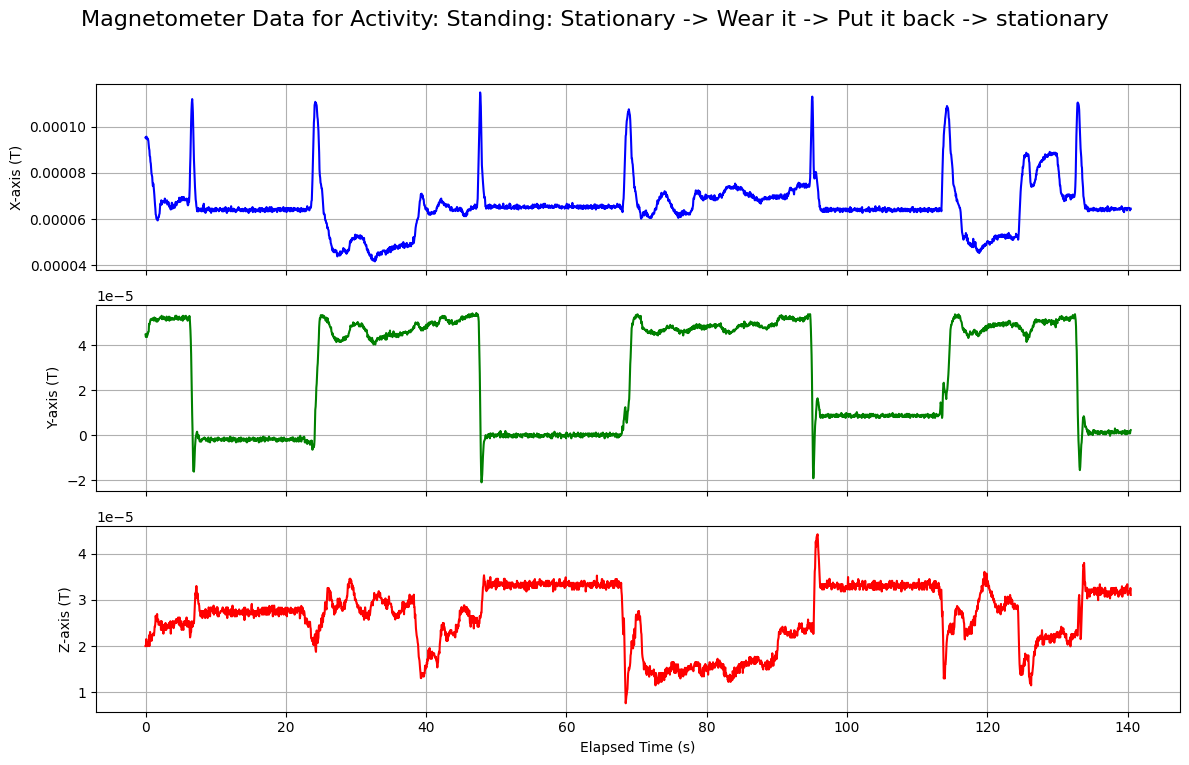

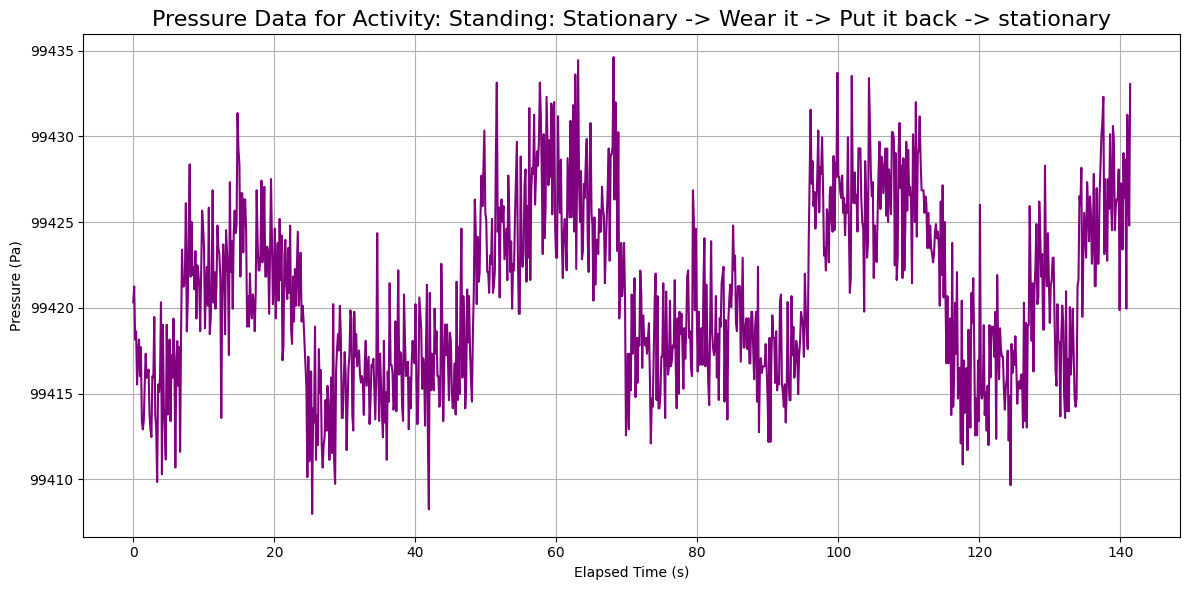

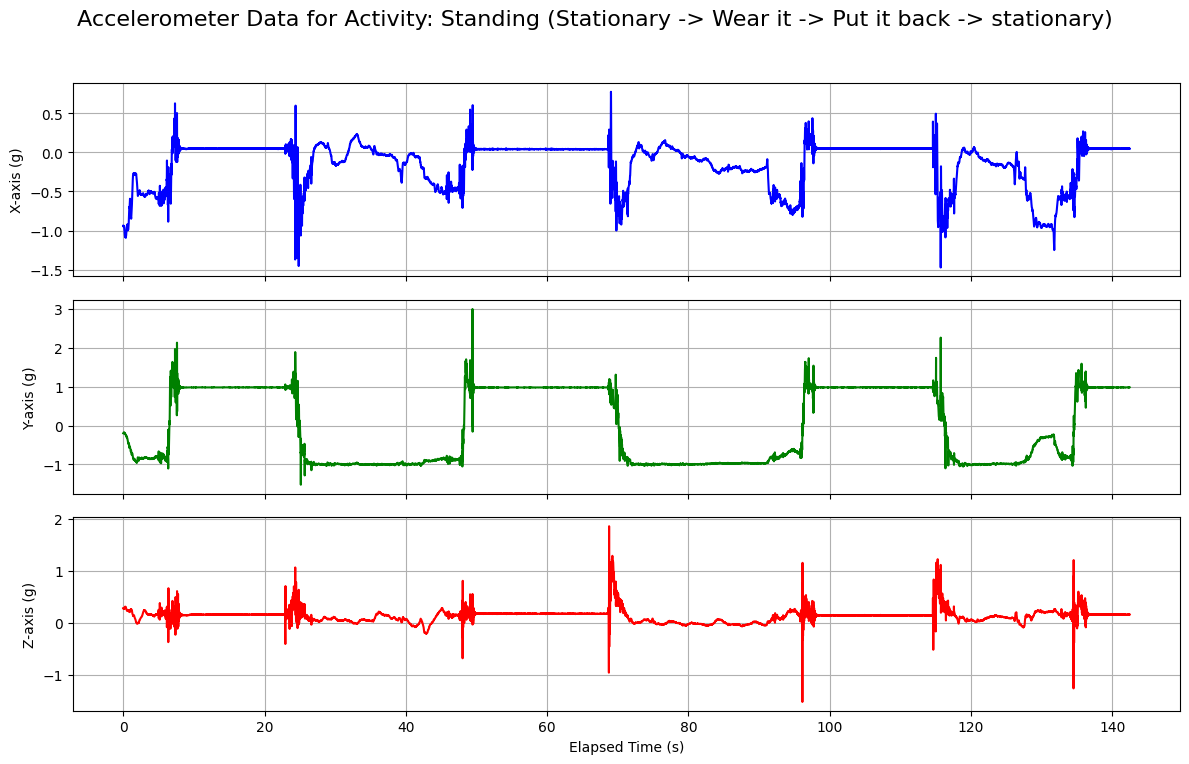

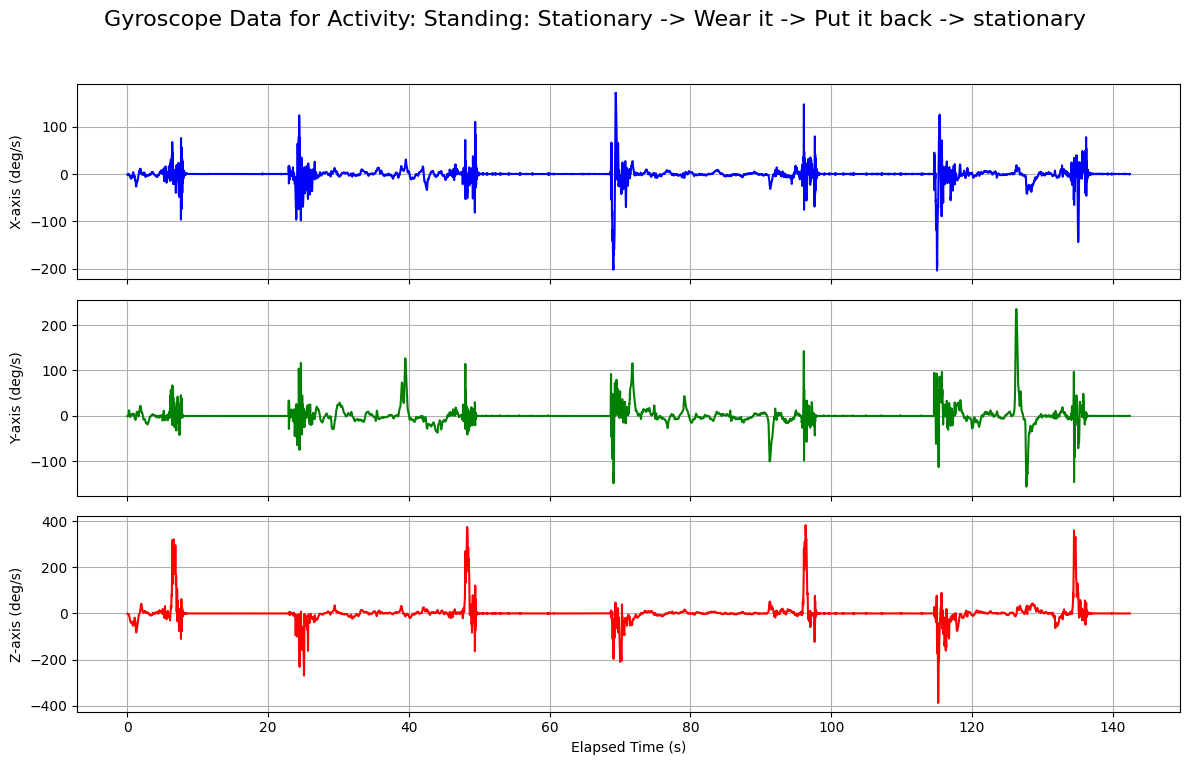

In [18]:
def visualize_accelerometer(user_id: str, file_name: str, activity_details):
    df = pd.read_csv(f'dataset/{user_id}/{file_name}')
    new_columns = {
        'x-axis (g)': 'x',
        'y-axis (g)': 'y',
        'z-axis (g)': 'z',
        'elapsed (s)': 'elapsed'
    }

    df = df.rename(columns=new_columns)

    fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
    fig.suptitle(f"Accelerometer Data for Activity: {activity_details['activity']} ({activity_details['details']})", fontsize=16)

    axes[0].plot(df['elapsed'], df['x'], color='blue')
    axes[0].set_ylabel('X-axis (g)')
    axes[0].grid(True)

    axes[1].plot(df['elapsed'], df['y'], color='green')
    axes[1].set_ylabel('Y-axis (g)')
    axes[1].grid(True)

    axes[2].plot(df['elapsed'], df['z'], color='red')
    axes[2].set_ylabel('Z-axis (g)')
    axes[2].set_xlabel('Elapsed Time (s)')
    axes[2].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


def visualize_gyroscope(user_id: str, experiment_id: str, activity_details):
    df = pd.read_csv(f'dataset/{user_id}/{experiment_id}')
    
    new_columns = {
        'x-axis (deg/s)': 'x',
        'y-axis (deg/s)': 'y',
        'z-axis (deg/s)': 'z',
        'elapsed (s)': 'elapsed'
    }
    df = df.rename(columns=new_columns)

    fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
    fig.suptitle(f"Gyroscope Data for Activity: {activity_details['activity']}: {activity_details['details']}", fontsize=16)

    axes[0].plot(df['elapsed'], df['x'], color='blue')
    axes[0].set_ylabel('X-axis (deg/s)')
    axes[0].grid(True)

    axes[1].plot(df['elapsed'], df['y'], color='green')
    axes[1].set_ylabel('Y-axis (deg/s)')
    axes[1].grid(True)

    axes[2].plot(df['elapsed'], df['z'], color='red')
    axes[2].set_ylabel('Z-axis (deg/s)')
    axes[2].set_xlabel('Elapsed Time (s)')
    axes[2].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


def visualize_pressure(user_id: str, experiment_id: str, activity_details):
    df = pd.read_csv(f'dataset/{user_id}/{experiment_id}')
    
    new_columns = {
        'pressure (Pa)': 'pressure',
        'elapsed (s)': 'elapsed'
    }
    df = df.rename(columns=new_columns)

    plt.figure(figsize=(12, 6))
    plt.plot(df['elapsed'], df['pressure'], color='purple')
    plt.title(f"Pressure Data for Activity: {activity_details['activity']}: {activity_details['details']}", fontsize=16)
    plt.xlabel('Elapsed Time (s)')
    plt.ylabel('Pressure (Pa)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


def visualize_magnetometer(user_id: str, experiment_id: str, activity_details):
    df = pd.read_csv(f'dataset/{user_id}/{experiment_id}')
    
    new_columns = {
        'x-axis (T)': 'x',
        'y-axis (T)': 'y',
        'z-axis (T)': 'z',
        'elapsed (s)': 'elapsed'
    }
    df = df.rename(columns=new_columns)

    fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
    fig.suptitle(f"Magnetometer Data for Activity: {activity_details['activity']}: {activity_details['details']}", fontsize=16)

    axes[0].plot(df['elapsed'], df['x'], color='blue')
    axes[0].set_ylabel('X-axis (T)')
    axes[0].grid(True)

    axes[1].plot(df['elapsed'], df['y'], color='green')
    axes[1].set_ylabel('Y-axis (T)')
    axes[1].grid(True)

    axes[2].plot(df['elapsed'], df['z'], color='red')
    axes[2].set_ylabel('Z-axis (T)')
    axes[2].set_xlabel('Elapsed Time (s)')
    axes[2].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



def visualize_according_to_sensor(user_id, experiment_id, sensor_files):
    """
    This function takes in user_id, experiment_id and sensor files for given experiment
    and create plots according to sensor type
    """
    activity_id = get_activity_id_from_experiment_id(experiment_id)
    activity_details = get_activity_details_from_activity_id(f'{activity_id}')
    
    for sensor_type, file_name in sensor_files.items():
        if sensor_type  == 'accelerometer':
            visualize_accelerometer(user_id, file_name, activity_details)
        elif sensor_type == 'gyroscope':
            visualize_gyroscope(user_id, file_name, activity_details)
        elif sensor_type == 'pressure':
            visualize_pressure(user_id, file_name, activity_details)
        elif sensor_type == 'magnetometer':
            visualize_magnetometer(user_id, file_name, activity_details)

def create_plots(user_id: str):
    """
    This function creates plots for all experiments for a particular user
    """
    experiment_sensor_files = get_files_grouped_by_experiment(user_id)

    for experiment_id, files in experiment_sensor_files.items():
        visualize_according_to_sensor(user_id, experiment_id, files)
        
        # Skip plotting after plotting one activity data
        # To plot all experiments, remove the break line below
        break

create_plots('User13')

In [23]:
def remove_outliers(df, columns):
    """
    This function removes outliers from the specified columns in the DataFrame
    based on the interquartile range (IQR) method.

    Parameters:
    df (pd.DataFrame): The DataFrame from which to remove outliers.
    columns (list): The list of column names to check for outliers.

    Returns:
    pd.DataFrame: A DataFrame with outliers removed for the specified columns.
    """
    # Create a copy of the DataFrame to avoid modifying the original data
    df_cleaned = df.copy()
    
    for col in columns:
        # Calculate the first and third quartile (Q1 and Q3)
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile range

        # Define the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out the rows that are outliers
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

In [31]:
def create_window_and_extract_features(accelerometer_fname, gyroscope_fname, activity_id, window_size = 100):
    """
    This function creates a window of specified size (Default 100)
    and extracts features in the window for both accelerometer and gyroscope.
    """
    accelerometer_csv = pd.read_csv(accelerometer_fname)
    gyroscope_csv = pd.read_csv(gyroscope_fname)

    # Mapping to rename columns for accelerometer
    new_accelerometer_columns = {
        'x-axis (g)': 'x',
        'y-axis (g)': 'y',
        'z-axis (g)': 'z',
        'epoch (ms)': 'epoch'
    }

    # rename the columns 
    new_gyroscope_columns = {
        'x-axis (deg/s)': 'x',
        'y-axis (deg/s)': 'y',
        'z-axis (deg/s)': 'z',
        'epoch (ms)': 'epoch'
    }

    # Add suffixes to column names to differentiate between the two DataFrames
    accelerometer_csv = accelerometer_csv.rename(columns=new_accelerometer_columns).add_suffix('_accelerometer')
    gyroscope_csv = gyroscope_csv.rename(columns=new_gyroscope_columns).add_suffix('_gyroscope')

    accelerometer_csv = remove_outliers(accelerometer_csv, ['x_accelerometer', 'y_accelerometer', 'z_accelerometer'])
    gyroscope_csv = remove_outliers(gyroscope_csv, ['x_gyroscope', 'y_gyroscope', 'z_gyroscope'])

    combined_df = pd.concat([accelerometer_csv, gyroscope_csv], axis=1)
    
    # Initialize a list to store windowed feature data
    feature_data = []

    # Loop through windows
    step_size = int(window_size * 0.75)  # Calculate the step size for 25% overlap
    for start in range(0, len(combined_df), step_size):
        window_data = combined_df.iloc[start:start + window_size]

        # Accelerometer features
        acc_x_mean = window_data['x_accelerometer'].mean()
        acc_y_mean = window_data['y_accelerometer'].mean()
        acc_z_mean = window_data['z_accelerometer'].mean()
        acc_x_var = window_data['x_accelerometer'].var()
        acc_y_var = window_data['y_accelerometer'].var()
        acc_z_var = window_data['z_accelerometer'].var()
        acc_sumxyz = window_data[['x_accelerometer', 'y_accelerometer', 'z_accelerometer']].sum(axis=1)
        acc_sum_mean = acc_sumxyz.mean()
        acc_sum_var = acc_sumxyz.var()
        acc_abssum = window_data[['x_accelerometer', 'y_accelerometer', 'z_accelerometer']].abs().sum(axis=1)
        acc_abssum_mean = acc_abssum.mean()
        acc_abssum_var = acc_abssum.var()

        # Gyroscope features
        gyro_x_mean = window_data['x_gyroscope'].mean()
        gyro_y_mean = window_data['y_gyroscope'].mean()
        gyro_z_mean = window_data['z_gyroscope'].mean()
        gyro_x_var = window_data['x_gyroscope'].var()
        gyro_y_var = window_data['y_gyroscope'].var()
        gyro_z_var = window_data['z_gyroscope'].var()
        gyro_sumxyz = window_data[['x_gyroscope', 'y_gyroscope', 'z_gyroscope']].sum(axis=1)
        gyro_sum_mean = gyro_sumxyz.mean()
        gyro_sum_var = gyro_sumxyz.var()
        gyro_abssum = window_data[['x_gyroscope', 'y_gyroscope', 'z_gyroscope']].abs().sum(axis=1)
        gyro_abssum_mean = gyro_abssum.mean()
        gyro_abssum_var = gyro_abssum.var()

        # Append all features and the activity ID to the feature data list
        feature_data.append([
            acc_x_mean, acc_y_mean, acc_z_mean, acc_x_var, acc_y_var, acc_z_var,
            acc_sum_mean, acc_sum_var, acc_abssum_mean, acc_abssum_var,
            gyro_x_mean, gyro_y_mean, gyro_z_mean, gyro_x_var, gyro_y_var, gyro_z_var,
            gyro_sum_mean, gyro_sum_var, gyro_abssum_mean, gyro_abssum_var,
            activity_id
        ])

    # Define the column names for the features
    columns = [
        'acc_x_mean', 'acc_y_mean', 'acc_z_mean', 'acc_x_var', 'acc_y_var', 'acc_z_var',
        'acc_sum_mean', 'acc_sum_var', 'acc_abssum_mean', 'acc_abssum_var',
        'gyro_x_mean', 'gyro_y_mean', 'gyro_z_mean', 'gyro_x_var', 'gyro_y_var', 'gyro_z_var',
        'gyro_sum_mean', 'gyro_sum_var', 'gyro_abssum_mean', 'gyro_abssum_var',
        'activity_id'
    ]

    # Create a DataFrame with the feature data
    feature_df = pd.DataFrame(feature_data, columns=columns)

    return feature_df

In [32]:
def get_features_and_save_df(user_ids: list, window_size: int = 100):
    """
    This function reads the sensor data for specified users.
    And this function calls create_window_and_extract_features
    that creates windows and extract features from the sensor data.
    Finally, it saves the features in a csv file.
    """
    df = pd.DataFrame()

    for user_id in user_ids:
        experiment_files = get_files_grouped_by_experiment(user_id)

        for experiment_id, files in experiment_files.items():
            activity_id = get_activity_id_from_experiment_id(experiment_id)

            # If sensor data not available for experiment, skip it
            if files.get("accelerometer") == None or files.get("gyroscope") == None:
                continue
            
            accelerometer_fname = f'dataset/{user_id}/{files["accelerometer"]}'
            gyroscope_fname = f'dataset/{user_id}/{files["gyroscope"]}'

            df_with_features = create_window_and_extract_features(accelerometer_fname, gyroscope_fname, activity_id, window_size)

            df = pd.concat([df, df_with_features], ignore_index=True)

    file_name = f'dataset/features-{window_size}.csv'
    df.to_csv(file_name, index=False)
    print(f'Features saved to {file_name}')
    return df

In [33]:
# The folder names such as User13 is like user_id
user_ids = list_folders_in_directory("dataset")

# This array stores window sizes 
window_sizes = [100, 200, 300, 400, 500]

# this loop loops through the window_sizes and extracts features
# for that window size
for window_size in window_sizes:
    get_features_and_save_df(user_ids, window_size=window_size)

Features saved to dataset/features-100.csv
Features saved to dataset/features-200.csv
Features saved to dataset/features-300.csv
Features saved to dataset/features-400.csv
Features saved to dataset/features-500.csv


In [22]:
# Read the windowed datasets with features

for window_size in window_sizes:
    try:
        file_name = f"dataset/features-{window_size}.csv"
        df = pd.read_csv(file_name)
        print(f"Features for window size {window_size}")
        print(df.head())
        print(f"Number of rows: {len(df)}")
        print(f"Number of columns: {len(df.columns)}")
        print("=" * 100)
    except FileNotFoundError as e:
        print(f"File {file_name} does not exist")
    except Exception as e:
        print(e)

Features for window size 100
   acc_x_mean  acc_y_mean  acc_z_mean  acc_x_var  acc_y_var  acc_z_var  \
0    -0.32687     0.77122    -0.48621   0.000581   0.000243   0.000095   
1    -0.49637     0.65586    -0.48955   0.008604   0.004677   0.000094   
2    -0.56887     0.60722    -0.48961   0.000094   0.000146   0.000070   
3    -0.57285     0.59398    -0.50119   0.000062   0.000172   0.000073   
4    -0.60141     0.57387    -0.48913   0.001019   0.000623   0.000475   

   acc_sum_mean  acc_sum_var  acc_abssum_mean  acc_abssum_var  ...  \
0      -0.04186     0.001827          1.58430        0.000410  ...   
1      -0.33006     0.024248          1.64178        0.000832  ...   
2      -0.45126     0.000300          1.66570        0.000414  ...   
3      -0.48006     0.000320          1.66802        0.000339  ...   
4      -0.51667     0.001375          1.66441        0.000669  ...   

   gyro_y_mean  gyro_z_mean  gyro_x_var  gyro_y_var  gyro_z_var  \
0     -9.15182     -5.30908   28.99608